In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks , peak_prominences

In [ ]:
import scipy.io


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/ChatterDetection/

/content/drive/MyDrive/ChatterDetection


In [ ]:
data = scipy.io.loadmat('1201-130-non_norm-shuffled.mat')
x = data['shuffled']
print(x.shape)
y = data ["shuffled_labels"]
print(y.shape)


(1201, 1906)
(1, 1906)


In [ ]:
x_transposed = np.transpose(x)
y_transposed = np.transpose(y)
df1 = pd.DataFrame(x_transposed)
df2 = pd.DataFrame(y_transposed, columns = ["Labels"])

In [ ]:
dff = pd.concat([df1, df2], axis=1)
dff

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,Labels
0,-0.698542,-1.193312,-0.867507,-0.886248,-0.955708,-0.759861,-0.944170,-1.113720,-0.802498,-0.932223,...,-0.831020,-1.367196,-0.834241,-0.679332,-1.297560,-0.769876,-1.106048,-0.943877,-0.740417,1
1,1.964512,1.964512,0.546992,1.700166,0.770071,0.189443,1.074559,0.872094,1.964512,1.964512,...,0.449947,1.832175,0.281920,0.485907,0.951745,-0.864637,-0.550838,-1.362218,-1.905247,2
2,-0.440323,-0.879981,-1.390330,-0.404773,-1.141422,-1.184586,-0.885721,-0.714472,-1.309450,-0.559037,...,-0.869966,-1.000277,-1.215919,-0.793244,-1.129650,-1.073602,-0.795118,-1.127659,-1.026983,1
3,-0.866218,1.066887,1.964512,-0.540120,1.284461,1.076257,-0.136011,1.964512,1.964512,1.964512,...,-0.670020,0.624944,-0.382986,-0.043652,0.696336,0.500548,0.325493,-0.118792,-0.206291,2
4,-1.068038,-0.647355,-0.524248,-1.091406,-0.529109,-0.892456,-0.905633,-0.737430,-1.092636,-0.799394,...,0.390595,-0.453734,-0.828970,-1.509044,-0.539886,-1.258321,-1.009238,-0.808764,-1.051113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0.117641,0.469391,0.342770,-0.341521,0.926854,-0.920919,0.050406,0.326079,-0.284477,0.203558,...,-0.565713,0.475716,-0.250391,-0.066551,-0.122131,-0.881504,-0.463573,-0.793479,-1.038169,2
1902,-0.847535,-0.517982,-0.913306,-0.793420,-0.659947,-0.906863,-0.686126,-0.706273,-0.862938,-0.530222,...,-0.470836,-0.282134,-1.854352,-0.014954,-0.390248,-1.576981,-0.256424,-0.542697,-1.189798,1
1903,0.305463,-0.091442,0.394543,-0.283364,-0.233876,-0.323072,-0.199614,0.156763,0.165079,0.314600,...,-0.834007,0.245257,0.117582,-0.620883,0.603391,-0.494262,-1.280752,0.056263,-1.224177,2
1904,-0.834124,-0.951432,-0.114576,-1.186108,-0.798164,-0.098001,-1.452235,-0.555230,-0.615963,-1.042562,...,-0.927479,-0.737020,-0.558627,-0.869908,-0.521437,-0.856320,-0.937435,-0.213963,-0.915414,1


In [ ]:
df_pred=dff[:800]
df_s = df_pred[df_pred["Labels"]==1]
df_c = df_pred[df_pred["Labels"]==2]
"""
df_s2 = df_s.drop(["Labels"],axis=1)
df_c2 = df_c.drop(["Labels"],axis=1)

df_s2 = df_s2.reset_index(drop=True)
df_c2 = df_c2.reset_index(drop=True)"""


'\ndf_s2 = df_s.drop(["Labels"],axis=1)\ndf_c2 = df_c.drop(["Labels"],axis=1)\n\ndf_s2 = df_s2.reset_index(drop=True)\ndf_c2 = df_c2.reset_index(drop=True)'

In [ ]:
df = dff.drop(["Labels"],axis=1)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-0.698542,-1.193312,-0.867507,-0.886248,-0.955708,-0.759861,-0.944170,-1.113720,-0.802498,-0.932223,...,-0.616901,-0.831020,-1.367196,-0.834241,-0.679332,-1.297560,-0.769876,-1.106048,-0.943877,-0.740417
1,1.964512,1.964512,0.546992,1.700166,0.770071,0.189443,1.074559,0.872094,1.964512,1.964512,...,-1.110675,0.449947,1.832175,0.281920,0.485907,0.951745,-0.864637,-0.550838,-1.362218,-1.905247
2,-0.440323,-0.879981,-1.390330,-0.404773,-1.141422,-1.184586,-0.885721,-0.714472,-1.309450,-0.559037,...,-1.201336,-0.869966,-1.000277,-1.215919,-0.793244,-1.129650,-1.073602,-0.795118,-1.127659,-1.026983
3,-0.866218,1.066887,1.964512,-0.540120,1.284461,1.076257,-0.136011,1.964512,1.964512,1.964512,...,-0.565128,-0.670020,0.624944,-0.382986,-0.043652,0.696336,0.500548,0.325493,-0.118792,-0.206291
4,-1.068038,-0.647355,-0.524248,-1.091406,-0.529109,-0.892456,-0.905633,-0.737430,-1.092636,-0.799394,...,-0.400380,0.390595,-0.453734,-0.828970,-1.509044,-0.539886,-1.258321,-1.009238,-0.808764,-1.051113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0.117641,0.469391,0.342770,-0.341521,0.926854,-0.920919,0.050406,0.326079,-0.284477,0.203558,...,-0.548202,-0.565713,0.475716,-0.250391,-0.066551,-0.122131,-0.881504,-0.463573,-0.793479,-1.038169
1902,-0.847535,-0.517982,-0.913306,-0.793420,-0.659947,-0.906863,-0.686126,-0.706273,-0.862938,-0.530222,...,-1.369890,-0.470836,-0.282134,-1.854352,-0.014954,-0.390248,-1.576981,-0.256424,-0.542697,-1.189798
1903,0.305463,-0.091442,0.394543,-0.283364,-0.233876,-0.323072,-0.199614,0.156763,0.165079,0.314600,...,-0.393645,-0.834007,0.245257,0.117582,-0.620883,0.603391,-0.494262,-1.280752,0.056263,-1.224177
1904,-0.834124,-0.951432,-0.114576,-1.186108,-0.798164,-0.098001,-1.452235,-0.555230,-0.615963,-1.042562,...,-0.496488,-0.927479,-0.737020,-0.558627,-0.869908,-0.521437,-0.856320,-0.937435,-0.213963,-0.915414


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
train_data = (dff[400:].sample(frac = 1))
test_data = (dff[:400].sample(frac = 1))

In [ ]:
test_data = test_data.reset_index(drop=True)
test_data
train_data = train_data.reset_index(drop=True)
train_data

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,Labels
0,-0.043007,-1.245495,-1.093749,-0.448580,-0.965020,-0.999164,-0.134078,-1.298263,-0.715117,-0.225559,...,0.099075,-1.190677,-0.796173,-0.485712,-0.796817,-1.002151,-0.594118,-1.218613,-0.585919,1
1,-0.690343,-1.096150,-0.485887,-0.639859,-0.875179,-0.323365,-0.187081,-0.462226,-0.082540,-0.627384,...,-0.303980,-0.091383,-0.281959,-1.028682,-1.210004,-1.017964,-0.809994,-0.802029,-0.556753,2
2,-1.670336,-1.380315,-1.938395,-0.489460,0.213514,0.853412,1.207915,0.496390,1.048848,-0.306908,...,0.234832,-1.949933,-1.011990,-1.409188,-1.023235,0.122384,0.794084,0.039689,2.075050,2
3,-0.323190,0.698737,-0.075336,0.643861,-0.075512,-0.407701,-0.649054,-0.814270,-1.054744,-0.300407,...,-0.861474,-0.332384,-0.536254,-0.126699,0.570184,0.030494,0.199048,0.207247,-0.456838,2
4,-0.736962,-1.216212,-0.816261,-0.725014,-1.139197,-0.801268,-0.980774,-0.984288,-0.891636,-0.949617,...,-0.989559,-1.572823,-0.189541,-0.951374,-1.153955,-0.528407,-1.014040,-1.084906,-0.458010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-0.954536,-0.583928,-1.134921,-1.043148,-0.695380,-1.353843,-1.087072,-0.994713,-1.111963,-0.930758,...,-1.325204,-0.183216,-1.714437,-0.738543,-0.489811,-1.792272,-0.507205,-0.334786,0.390595,1
1502,-0.562844,-0.914946,-0.721266,-0.651982,-0.697898,-0.851108,-0.499885,-0.815617,-0.878517,-0.610985,...,0.390595,-0.963790,-1.255803,-0.253437,-0.976382,-0.922091,-0.080021,-1.420902,-0.546328,1
1503,-0.170975,-1.200164,-0.839629,-0.107021,-1.681640,-0.776436,-0.738836,-0.925253,-0.538421,-0.640444,...,-0.567178,-0.942999,-0.615671,-0.757343,-0.873773,-0.493032,-0.833304,-0.778486,-0.555699,1
1504,-0.289572,1.078307,0.934526,0.916195,1.964512,0.048181,-0.960920,0.492759,1.964512,-1.996610,...,-1.753442,-0.717576,-0.655379,-1.656397,0.737391,0.016028,1.352223,1.053006,-0.265150,2


In [ ]:
df_s1 = dff[dff["Labels"]==1]
df_c1 = dff[dff["Labels"]==2]

df_s1 = df_s1.drop(["Labels"],axis=1)
df_s1 = df_s1.reset_index(drop=True)

df_c1 = df_c1.drop(["Labels"],axis=1)
df_c1 = df_c1.reset_index(drop=True)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


In [ ]:
!pip install tensorflow==2.8


In [ ]:
!pip install keras==2.8

In [ ]:
# Load the data from dff
num_samples, num_points = dff.shape[0], dff.shape[1]
print(num_samples, num_points)

1906 1202


In [ ]:
input_shape = (num_points,)
latent_dim = 3
h_dim1 = 512
h_dim2 = 256
h_dim3 = 128
h_dim4 = 64
h_dim5 = 8


In [ ]:
# Encoder
inputs = Input(shape=input_shape)
enc1 = Dense(h_dim1, activation='leaky_relu')(inputs)
enc2 = Dense(h_dim2, activation='leaky_relu')(enc1)
enc3 = Dense(h_dim3, activation='leaky_relu')(enc2)
enc4 = Dense(h_dim4, activation='leaky_relu')(enc3)
enc5 = Dense(h_dim5, activation='leaky_relu')(enc4)


z_mean = Dense(latent_dim)(enc5)
z_log_var = Dense(latent_dim)(enc5)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = Input(shape=(latent_dim,))
dec1 = Dense(h_dim5, activation='leaky_relu')(decoder_inputs)
dec2 = Dense(h_dim4, activation='leaky_relu')(dec1)
dec3 = Dense(h_dim3, activation='leaky_relu')(dec2)
dec4 = Dense(h_dim2, activation='leaky_relu')(dec3)
dec5 = Dense(h_dim1, activation='leaky_relu')(dec4)

outputs = Dense(num_points)(dec5)

# Define the models
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_inputs, outputs, name='decoder')

# VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
encoder.summary()
decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1202)]       0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 512)          615936      ['input_1[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 256)          131328      ['dense_27[0][0]']               
                                                                                                  
 dense_29 (Dense)               (None, 128)          32896       ['dense_28[0][0]']               
                                                                                            

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [ ]:
from tensorflow.random import set_seed
set_seed(2021)

In [ ]:
# Define the loss function
def vae_loss(inputs, outputs):
    reconstruction_loss = mse(inputs, outputs)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return reconstruction_loss + kl_loss

# Compile the VAE
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002), loss=vae_loss,experimental_run_tf_function=False)

# Train the VAE
epochs = 200
batch_size = 32

history = vae.fit(dff[200:], dff[200:], validation_data =(dff[:200],dff[:200]),batch_size=batch_size, epochs=epochs,shuffle = True)



Train on 1706 samples, validate on 200 samples
Epoch 1/200
1706/1706 [==============================] - 1s 871us/sample - loss: 1.1600 - val_loss: 1.3270
Epoch 2/200
1706/1706 [==============================] - 1s 308us/sample - loss: 0.8961 - val_loss: 1.2185
Epoch 3/200
1706/1706 [==============================] - 1s 304us/sample - loss: 0.8421 - val_loss: 1.1397
Epoch 4/200
1706/1706 [==============================] - 0s 264us/sample - loss: 0.7816 - val_loss: 1.0790
Epoch 5/200
1706/1706 [==============================] - 0s 293us/sample - loss: 0.7258 - val_loss: 1.0286
Epoch 6/200
1706/1706 [==============================] - 1s 319us/sample - loss: 0.6986 - val_loss: 1.0258
Epoch 7/200
1706/1706 [==============================] - 1s 328us/sample - loss: 0.6884 - val_loss: 0.9820
Epoch 8/200
1706/1706 [==============================] - 1s 316us/sample - loss: 0.6821 - val_loss: 0.9742
Epoch 9/200
1706/1706 [==============================] - 1s 294us/sample - loss: 0.6801 - val_los

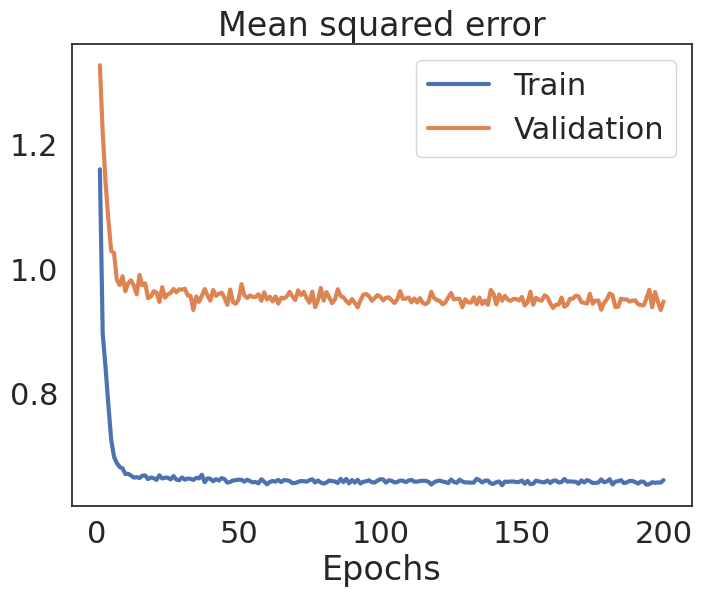

Training MSE = 0.8130679499395828
Validation MSE = 0.9735848794385179


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)
sns.set_style("white")

def model_analysis(history):
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(8, 6))
    plt.title("Mean squared error")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.savefig("FirstNet.png", dpi=400)
    plt.show()
    print(f"Training MSE = {np.sqrt(train_loss[-1])}")
    print(f"Validation MSE = {np.sqrt(val_loss[-1])}")


model_analysis(history)

In [ ]:
pred_c2 = vae.predict(df_s[0:1])


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
pred_c2

array([[-0.40473852, -0.41619033, -0.40032458, ..., -0.43573415,
        -0.41309705,  1.2728568 ]], dtype=float32)

In [ ]:
df_s[0:1]

,0,1,2,3,4,5,6,7,8,9,...,1192,1193,1194,1195,1196,1197,1198,1199,1200,Labels
0,-0.698542,-1.193312,-0.867507,-0.886248,-0.955708,-0.759861,-0.94417,-1.11372,-0.802498,-0.932223,...,-0.83102,-1.367196,-0.834241,-0.679332,-1.29756,-0.769876,-1.106048,-0.943877,-0.740417,1


In [ ]:
df_c2

In [ ]:
# Generate artificial tabular data using the trained VAE
latent_samples = np.random.normal(size=(num_samples, latent_dim))
generated_signals = decoder.predict(latent_samples)

# Concatenate the generated signals with the labels
generated_data = np.hstack((generated_signals, label))

# Save the generated data to a CSV file
#np.savetxt('generated_data.csv', generated_data, delimiter=',')


In [ ]:
generated_data

array([[-0.18479198, -0.16797367, -0.15222222, ..., -0.17042336,
         0.9334147 ,  1.        ],
       [-0.28012311, -0.26749596, -0.22274405, ..., -0.28467828,
         1.26195741,  1.        ],
       [-0.20617652, -0.1837495 , -0.17567587, ..., -0.19986036,
         0.89770126,  1.        ],
       ...,
       [-0.14996663, -0.14333519, -0.12450075, ..., -0.13856503,
         0.93326926,  1.        ],
       [-0.12337212, -0.11225318, -0.10350738, ..., -0.11942782,
         0.71648759,  1.        ],
       [-0.12104432, -0.1100579 , -0.10378228, ..., -0.11690474,
         0.67335916,  1.        ]])

In [ ]:
label = np.full((num_samples, 1), 1)
label

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
data['shuffled_labels'].shape

(1, 1906)

In [ ]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = x_transposed
y = y_transposed

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a TensorFlow SVM model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_scaled)


Train on 1524 samples
Epoch 1/100
1524/1524 [==============================] - 0s 101us/sample - loss: 1.2396 - accuracy: 0.0230
Epoch 2/100
1524/1524 [==============================] - 0s 76us/sample - loss: 1.1156 - accuracy: 0.0210
Epoch 3/100
1524/1524 [==============================] - 0s 105us/sample - loss: 1.0052 - accuracy: 0.0210
Epoch 4/100
1524/1524 [==============================] - 0s 96us/sample - loss: 0.9162 - accuracy: 0.0138
Epoch 5/100
1524/1524 [==============================] - 0s 96us/sample - loss: 0.8183 - accuracy: 0.0335
Epoch 6/100
1524/1524 [==============================] - 0s 108us/sample - loss: 0.7707 - accuracy: 0.0282
Epoch 7/100
1524/1524 [==============================] - 0s 99us/sample - loss: 0.6854 - accuracy: 0.0459
Epoch 8/100
1524/1524 [==============================] - 0s 94us/sample - loss: 0.6226 - accuracy: 0.0919
Epoch 9/100
1524/1524 [==============================] - 0s 97us/sample - loss: 0.5869 - accuracy: 0.1142
Epoch 10/100
1524/152

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras import backend as K


latent_dimension = 1
batch_size = 20
hidden_nodes = 16


input_encoder = Input(shape=(7,), name="Input_Encoder")
batch_normalize1 = BatchNormalization()(input_encoder)
hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Encoding")(
    batch_normalize1
)
batch_normalize2 = BatchNormalization()(hidden_layer)
z = Dense(latent_dimension, name="Mean")(batch_normalize2)

In [ ]:
dff.iloc[0:,0:1201]

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-0.698542,-1.193312,-0.867507,-0.886248,-0.955708,-0.759861,-0.944170,-1.113720,-0.802498,-0.932223,...,-0.616901,-0.831020,-1.367196,-0.834241,-0.679332,-1.297560,-0.769876,-1.106048,-0.943877,-0.740417
1,1.964512,1.964512,0.546992,1.700166,0.770071,0.189443,1.074559,0.872094,1.964512,1.964512,...,-1.110675,0.449947,1.832175,0.281920,0.485907,0.951745,-0.864637,-0.550838,-1.362218,-1.905247
2,-0.440323,-0.879981,-1.390330,-0.404773,-1.141422,-1.184586,-0.885721,-0.714472,-1.309450,-0.559037,...,-1.201336,-0.869966,-1.000277,-1.215919,-0.793244,-1.129650,-1.073602,-0.795118,-1.127659,-1.026983
3,-0.866218,1.066887,1.964512,-0.540120,1.284461,1.076257,-0.136011,1.964512,1.964512,1.964512,...,-0.565128,-0.670020,0.624944,-0.382986,-0.043652,0.696336,0.500548,0.325493,-0.118792,-0.206291
4,-1.068038,-0.647355,-0.524248,-1.091406,-0.529109,-0.892456,-0.905633,-0.737430,-1.092636,-0.799394,...,-0.400380,0.390595,-0.453734,-0.828970,-1.509044,-0.539886,-1.258321,-1.009238,-0.808764,-1.051113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0.117641,0.469391,0.342770,-0.341521,0.926854,-0.920919,0.050406,0.326079,-0.284477,0.203558,...,-0.548202,-0.565713,0.475716,-0.250391,-0.066551,-0.122131,-0.881504,-0.463573,-0.793479,-1.038169
1902,-0.847535,-0.517982,-0.913306,-0.793420,-0.659947,-0.906863,-0.686126,-0.706273,-0.862938,-0.530222,...,-1.369890,-0.470836,-0.282134,-1.854352,-0.014954,-0.390248,-1.576981,-0.256424,-0.542697,-1.189798
1903,0.305463,-0.091442,0.394543,-0.283364,-0.233876,-0.323072,-0.199614,0.156763,0.165079,0.314600,...,-0.393645,-0.834007,0.245257,0.117582,-0.620883,0.603391,-0.494262,-1.280752,0.056263,-1.224177
1904,-0.834124,-0.951432,-0.114576,-1.186108,-0.798164,-0.098001,-1.452235,-0.555230,-0.615963,-1.042562,...,-0.496488,-0.927479,-0.737020,-0.558627,-0.869908,-0.521437,-0.856320,-0.937435,-0.213963,-0.915414


In [ ]:
train_dataset = []
for i in range(1906):
  df = dff.iloc[i:i+1,0:1200]
  train_dataset.append(np.array(df))

train_dataset = np.array(train_dataset)
train_data = np.expand_dims(train_dataset,axis=-1)
train_data.shape

(1906, 1, 1200, 1)

In [ ]:
X_train, X_test = train_test_split(train_data,  test_size=0.2)

In [ ]:
decoder = Model(input_decoder, decoded, name="Decoder")


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 1, 1200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 1, 599, 32)   160         ['encoder_input[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 1, 599, 32)  128         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [ ]:
# decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2DTranspose(filters=filters,kernel_size=(22, 1),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

filters = filters// 2
x = Conv2DTranspose(filters=filters,kernel_size=(1, 4),activation='relu',strides=(1,2))(x)
x = BatchNormalization()(x)

filters = filters// 2
outputs = Conv2DTranspose(filters=1,kernel_size=kernel_size,padding='same',name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_13 (Dense)            (None, 38336)             115008    
                                                                 
 reshape_6 (Reshape)         (None, 1, 599, 64)        0         
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 1, 599, 64)       90176     
 Transpose)                                                      
                                                                 
 batch_normalization_26 (Bat  (None, 1, 599, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 1, 1200, 32)      8224

In [ ]:
# VAE model (merging encoder and decoder)
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 1, 1200, 1)]      0         
                                                                 
 encoder (Functional)        [(None, 2),               659124    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 1, 1200, 1)        214593    
                                                                 
Total params: 873,717
Trainable params: 873,333
Non-trainable params: 384
_________________________________________________________________


In [ ]:
# defining Custom loss function
reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))

reconstruction_loss *= input_shape[0] * input_shape[1]
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

#optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.999)

# compiling vae
vae.compile(optimizer=optimizer, loss=None)
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 1, 1200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 encoder (Functional)           [(None, 2),          659124      ['encoder_input[0][0]']          
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 decoder (Functional)           (None, 1, 1200, 1)   214593      ['encoder[0][2]']              

In [ ]:
callbacks = EarlyStopping(monitor = 'val_loss',
                          mode='min',
                          patience =50,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
# fit vae model
history = vae.fit(X_train,X_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, X_test),callbacks=callbacks)

Epoch 1/1000
48/48 [==============================] - 3s 36ms/step - loss: 764.2294 - val_loss: 886.9250
Epoch 2/1000
48/48 [==============================] - 1s 21ms/step - loss: 561.3482 - val_loss: 842.7978
Epoch 3/1000
48/48 [==============================] - 1s 21ms/step - loss: 528.6868 - val_loss: 843.5004
Epoch 4/1000
48/48 [==============================] - 1s 21ms/step - loss: 524.4537 - val_loss: 845.6274
Epoch 5/1000
48/48 [==============================] - 1s 19ms/step - loss: 504.7318 - val_loss: 839.6922
Epoch 6/1000
48/48 [==============================] - 1s 18ms/step - loss: 505.7098 - val_loss: 811.0983
Epoch 7/1000
48/48 [==============================] - 1s 20ms/step - loss: 587.1314 - val_loss: 801.3583
Epoch 8/1000
48/48 [==============================] - 1s 18ms/step - loss: 501.0010 - val_loss: 781.3104
Epoch 9/1000
48/48 [==============================] - 1s 18ms/step - loss: 493.5494 - val_loss: 768.7398
Epoch 10/1000
48/48 [==============================] - 

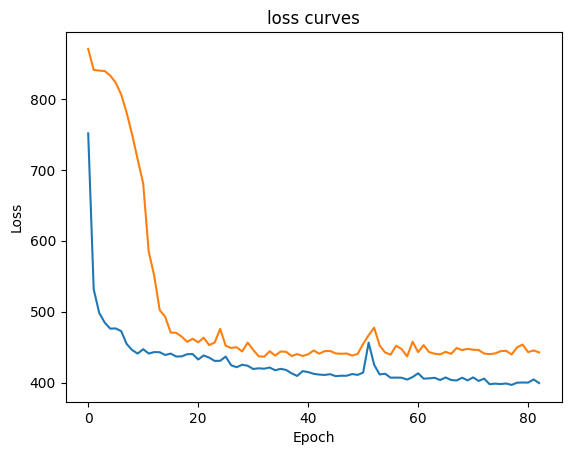

In [ ]:
# loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

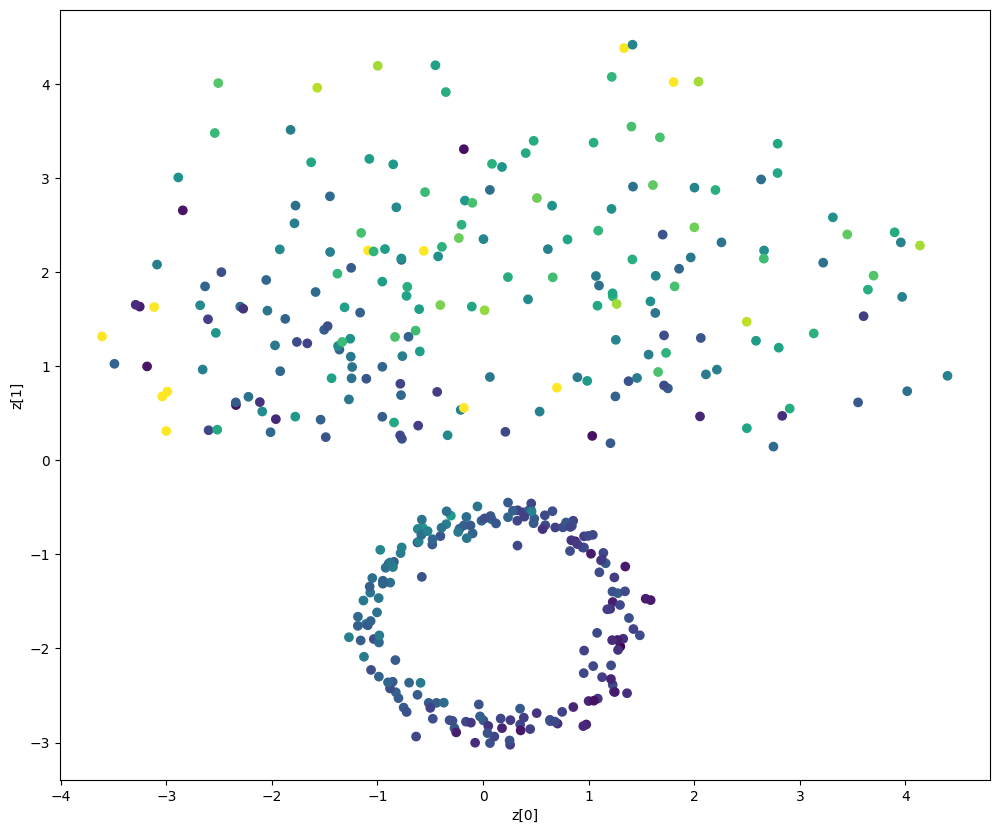

In [ ]:
# 2D plot of the classes in latent space
z_m, _, _ = encoder.predict(X_test,batch_size=batch_size)
plt.figure(figsize=(12, 10))
plt.scatter(z_m[:, 0], z_m[:, 1], c=X_test[:,0,0,0])
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()

In [ ]:
X_test

array([[[[ 0.33638647],
         [-0.63634464],
         [-0.16552849],
         ...,
         [-0.6000334 ],
         [ 0.08045084],
         [-1.13468704]]],


       [[[-0.98270696],
         [-0.53484888],
         [-0.48875704],
         ...,
         [-0.76237976],
         [-0.76079847],
         [-0.63365058]]],


       [[[ 1.42543066],
         [ 0.52848461],
         [-0.20289392],
         ...,
         [ 1.96451214],
         [-0.85362638],
         [-1.15536102]]],


       ...,


       [[[ 1.42976459],
         [ 1.42906179],
         [ 1.27233781],
         ...,
         [ 1.23497238],
         [-1.75033816],
         [-0.99389316]]],


       [[[-0.90018675],
         [-0.87324616],
         [-0.13583527],
         ...,
         [-0.53730868],
         [-1.04338186],
         [-0.35130145]]],


       [[[-1.15834791],
         [ 1.23555805],
         [ 0.85774551],
         ...,
         [-0.27170957],
         [-1.1989345 ],
         [-0.58047219]]]])

In [ ]:
pred=vae.predict(X_test)
pred



array([[[[-0.443806  ],
         [-0.43810737],
         [-0.22153038],
         ...,
         [-0.14085886],
         [ 0.08158907],
         [ 0.24180332]]],


       [[[-1.2934339 ],
         [-0.5865377 ],
         [-0.84968376],
         ...,
         [-1.0655904 ],
         [-1.0135427 ],
         [-0.6281987 ]]],


       [[[ 1.1572814 ],
         [ 0.58475536],
         [-0.03496104],
         ...,
         [-0.56218374],
         [-0.545754  ],
         [-0.7992181 ]]],


       ...,


       [[[ 1.1753614 ],
         [ 1.0811688 ],
         [ 0.81852114],
         ...,
         [ 0.218252  ],
         [-0.46556908],
         [-0.82355815]]],


       [[[-1.0019233 ],
         [-0.99502903],
         [-0.66025776],
         ...,
         [-0.6342568 ],
         [-1.1015122 ],
         [-1.0055993 ]]],


       [[[ 0.22758532],
         [ 0.6774358 ],
         [ 0.88656807],
         ...,
         [ 0.7955535 ],
         [ 0.6038122 ],
         [ 0.14928648]]]], dtype=float32)

 ...]

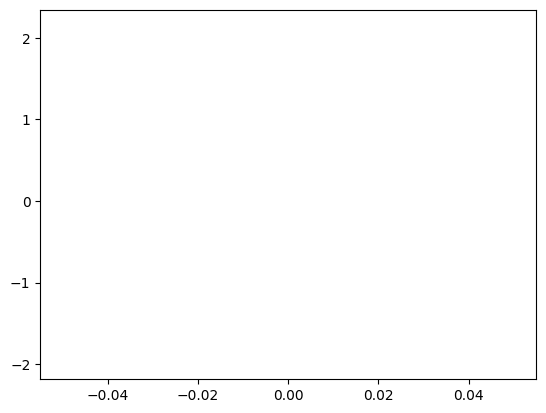

In [ ]:
# observing generated signals
plt.plot(X_test[0,:,:,0])
plt.plot(pred[0,:,:,0])

In [ ]:
df2 = pd.DataFrame(np.hstack((data['shuffled'], data['shuffled_labels'])))
df2

ValueError: ignored

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 21 14:43:43 2022',
 '__version__': '1.0',
 '__globals__': [],
 'shuffled': array([[-0.69854227,  1.96451214, -0.44032254, ...,  0.30546336,
         -0.83412373,  0.35606482],
        [-1.19331212,  1.96451214, -0.87998131, ..., -0.09144186,
         -0.95143245, -0.09606861],
        [-0.86750664,  0.54699163, -1.39032985, ...,  0.39454301,
         -0.11457563,  0.15705583],
        ...,
        [-1.10604802, -0.55083754, -0.79511844, ..., -1.28075191,
         -0.93743505, -0.88449093],
        [-0.94387737, -1.36221792, -1.12765906, ...,  0.05626287,
         -0.21396299, -0.88454949],
        [-0.74041732, -1.90524657, -1.02698324, ..., -1.22417667,
         -0.91541404, -0.37256109]]),
 'shuffled_labels': array([[1, 2, 1, ..., 2, 1, 2]], dtype=uint8)}

In [ ]:
df = pd.DataFrame(data)
df

ValueError: ignored